### Import the libraries

In [1]:
!pip install tensorflow

### Creating a Constant Tensor in TensorFlow



In [2]:
import tensorflow as tf
x = tf.constant(5)
print(x)

tf.Tensor(5, shape=(), dtype=int32)


### declaring tensor arrays


In [3]:
import tensorflow as tf
x = tf.constant([1,2,3,4,5])
print(x)

tf.Tensor([1 2 3 4 5], shape=(5,), dtype=int32)


### constants in tensors 2 d


In [4]:
import tensorflow as tf
x = tf.constant([[1,2,3],[4,5,6]])
print(x)

tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)


### converting tensors into numpy


In [5]:
import tensorflow as tf
x = tf.constant([[1,2,3],[4,5,6]])
print(x.numpy())

[[1 2 3]
 [4 5 6]]


### using tf ones and zeros


In [6]:
print(tf.zeros(shape=[2,3]))
print(tf.ones(shape=[2,3]))

tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32)


In [7]:
initial_value = tf.random.normal(shape=(2, 2))
a = tf.Variable(initial_value)
print(a)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-2.0186815 ,  1.8841257 ],
       [ 0.46264318, -1.6432669 ]], dtype=float32)>


### changing the tensor variables


In [8]:
new_value = tf.random.normal(shape=(2, 2))
a.assign(new_value)
for i in range(2):
  for j in range(2):
    assert a[i, j] == new_value[i, j]

In [9]:
print(a)


<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-1.4100908,  1.898935 ],
       [-0.8165002, -0.1931665]], dtype=float32)>


### math in tensors


In [10]:
a = tf.random.normal(shape=(2, 2))
b = tf.random.normal(shape=(2, 2))
print(tf.add(a, b))
print(tf.multiply(a, b))

c = a + b
d = tf.square(c)
e = tf.exp(d)
print(c)
print(d)
print(e)

tf.Tensor(
[[ 2.2850106  -0.43234217]
 [ 1.4622948   1.0376263 ]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 1.2769548  -0.07293472]
 [-1.5521377  -0.25579908]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 2.2850106  -0.43234217]
 [ 1.4622948   1.0376263 ]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[5.2212734  0.18691975]
 [2.1383061  1.0766683 ]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[185.16983     1.2055305]
 [  8.485053    2.934885 ]], shape=(2, 2), dtype=float32)


### computing gradients with gradient tape


In [11]:
a = tf.random.normal(shape=(2, 2))
b = tf.random.normal(shape=(2, 2))

with tf.GradientTape() as tape:
  tape.watch(a)
  c = tf.sqrt(tf.square(a) + tf.square(b))
  dc_da = tape.gradient(c, a)
  print(dc_da)

a = tf.Variable(a)

with tf.GradientTape() as tape:
  c = tf.sqrt(tf.square(a) + tf.square(b))
  dc_da = tape.gradient(c, a)
  print(dc_da)

tf.Tensor(
[[ 0.86087114 -0.5193216 ]
 [ 0.71938735 -0.5281582 ]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 0.86087114 -0.5193216 ]
 [ 0.71938735 -0.5281582 ]], shape=(2, 2), dtype=float32)


### end to end linear regression example using tensors


In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
input_dim = 2
output_dim = 1
learning_rate = 0.01
iterations = 1000

# This is our weight matrix
w = tf.Variable(tf.random.uniform(shape=(input_dim, output_dim)))
# This is our bias vector
b = tf.Variable(tf.zeros(shape=(output_dim,)))

def regression(x):
  return tf.matmul(x, w) + b

def mean_squared_error(y_true, y_pred):
  return tf.reduce_mean(tf.square(y_true - y_pred))

def compute_predictions(x):
  return regression(x)

def compute_loss(labels, predictions):
  return tf.reduce_mean(tf.square(labels - predictions))

def train_on_batch(x, y):
  with tf.GradientTape() as tape:
    predictions = compute_predictions(x)
    loss = compute_loss(y, predictions)
    # Note that `tape.gradient` works with a list as well (w, b).
    dloss_dw, dloss_db = tape.gradient(loss, [w, b])
  w.assign_sub(learning_rate * dloss_dw)
  b.assign_sub(learning_rate * dloss_db)
  return loss

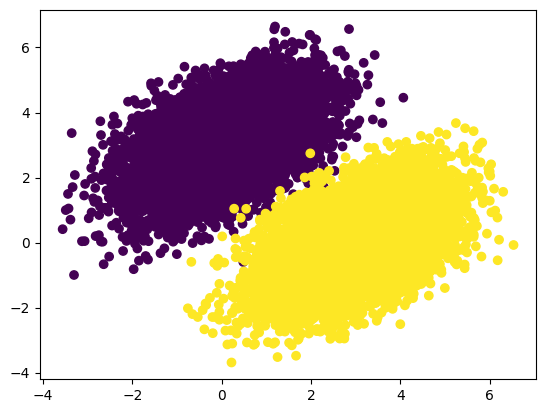

In [13]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

num_samples = 10000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3], cov=[[1, 0.5],[0.5, 1]], size=num_samples)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0], cov=[[1, 0.5],[0.5, 1]], size=num_samples)
features = np.vstack((negative_samples, positive_samples)).astype(np.float32)
labels = np.vstack((np.zeros((num_samples, 1), dtype='float32'),
                    np.ones((num_samples, 1), dtype='float32')))

plt.scatter(features[:, 0], features[:, 1], c=labels[:, 0])

### Shuffle the data.


In [14]:
indices = np.random.permutation(len(features))
features = features[indices]
labels = labels[indices]



Epoch 0: last batch loss = 0.0874
Epoch 1: last batch loss = 0.0369
Epoch 2: last batch loss = 0.0283
Epoch 3: last batch loss = 0.0337
Epoch 4: last batch loss = 0.0334
Epoch 5: last batch loss = 0.0305
Epoch 6: last batch loss = 0.0375
Epoch 7: last batch loss = 0.0353
Epoch 8: last batch loss = 0.0323
Epoch 9: last batch loss = 0.0246


### Create a tf.data.Dataset object for easy batched iteration


In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((features, labels))
dataset = dataset.shuffle(buffer_size=1024).batch(256)

for epoch in range(10):
  for step, (x, y) in enumerate(dataset):
    loss = train_on_batch(x, y)
  print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))